In [1]:
N = (14 + 4 ) % 5 + 1
N

4

In [23]:
import pandas as pd
data = pd.read_csv('NationalNames.csv')
print(data.head(8))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [24]:
columns = data.columns
print("Імена стовпців:", columns)


Імена стовпців: Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [25]:
unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

print("Кількість унікальних жіночих імен:", unique_female_names)
print("Кількість унікальних чоловічих імен:", unique_male_names)


Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [26]:
data_2010_male = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]
top_5_male_names = data_2010_male.groupby('Name')['Count'].sum().nlargest(5)
print("5 найпопулярніших чоловічих імен у 2010 році:")
print(top_5_male_names)


5 найпопулярніших чоловічих імен у 2010 році:
Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [27]:
most_popular_name = data.loc[data['Count'].idxmax()]
print("Найпопулярніше ім’я за результатами одного року:")
print(most_popular_name)


Найпопулярніше ім’я за результатами одного року:
Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object


In [28]:
year_with_most_unique_names = data.groupby('Year')['Name'].nunique().idxmax()
data_year = data[data['Year'] == year_with_most_unique_names]
most_popular_name_in_year = data_year.loc[data_year['Count'].idxmax()]
print("Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (2008):")
print(most_popular_name_in_year)

Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (2008):
Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object


In [29]:
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
if not jacob_female.empty:
    year_jacob_female = jacob_female.loc[jacob_female['Count'].idxmax()]['Year']
    print("Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен:", year_jacob_female)
else:
    print("Ім'я 'Jacob' не було серед найпопулярніших жіночих імен.")


Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: 2004


In [30]:
neutral_names = data.groupby('Name')['Gender'].nunique().eq(2)
neutral_names_list = neutral_names[neutral_names].index

neutral_data = data[data['Name'].isin(neutral_names_list)]
year_with_most_neutral_names = neutral_data.groupby('Year')['Name'].nunique().idxmax()
print("Рік із найбільшою кількістю гендерно нейтральних імен:", year_with_most_neutral_names)


Рік із найбільшою кількістю гендерно нейтральних імен: 2009


In [31]:
births_per_year = data.groupby('Year')['Count'].sum()
print("Загальна кількість народжень за рік:")
print(births_per_year)

Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
1885     240855
1886     255319
1887     247396
1888     299480
1889     288950
1890     301402
1891     286678
1892     334383
1893     325223
1894     338694
1895     351028
1896     357490
1897     346960
1898     381463
1899     339235
1900     450327
1901     345819
1902     386736
1903     381207
1904     403496
1905     423948
1906     428462
1907     465399
1908     488657
1909     511227
1910     590719
1911     644267
1912     988048
1913    1137075
1914    1416310
1915    1832477
1916    1934422
1917    2006791
1918    2171184
1919    2110294
1920    2262746
1921    2334456
1922    2289206
1923    2302498
1924    2381627
1925    2333310
1926    2295809
1927    2319047
1928    2260635
1929    2191735
1930    2222937
1931    2103624
1932    2110802
1933    1998837
1934    2076330
1935    2089358
1936    2077176
1937    2130181
1938    2212118
1939    220306

In [32]:

year_with_most_births = births_per_year.idxmax()
print("Рік, коли народилося найбільше дітей:", year_with_most_births)


Рік, коли народилося найбільше дітей: 1957


In [33]:

gender_births_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("Кількість дівчаток та хлопчиків, які народились кожного року:")
print(gender_births_per_year)


Кількість дівчаток та хлопчиків, які народились кожного року:
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
1885     133055   107800
1886     144535   110784
1887     145982   101414
1888     178627   120853
1889     178366   110584
1890     190377   111025
1891     185482   101196
1892     212346   122037
1893     212906   112317
1894     222922   115772
1895     233630   117398
1896     237920   119570
1897     234202   112758
1898     258770   122693
1899     233023   106212
1900     299828   150499
1901     239348   106471
1902     264077   122659
1903     261973   119234
1904     275371   128125
1905     291629   132319
1906     295303   133159
1907     318566   146833
1908     334313   154344
1909     347228   163999
1910     396501   194218
1911     418299   225968
1912     558103   429945
1913     624518   512557
1914     761548   654762
1915     9838

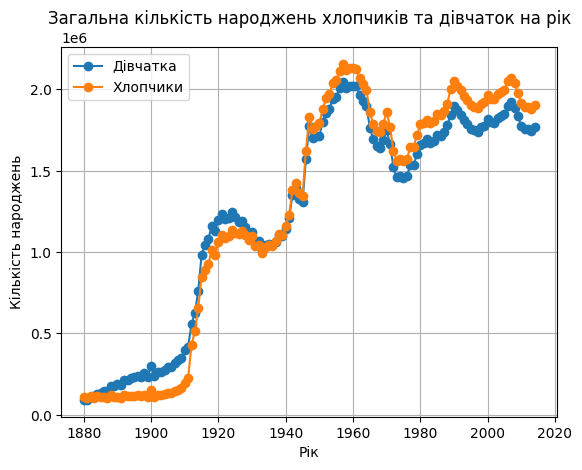

In [34]:
import matplotlib.pyplot as plt
gender_births_per_year.plot(kind='line', marker='o')
plt.title("Загальна кількість народжень хлопчиків та дівчаток на рік")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend(["Дівчатка", "Хлопчики"])
plt.grid(visible=True)
plt.show()


In [35]:

num_neutral_names = len(neutral_names_list)
print("Кількість гендерно-нейтральних імен:", num_neutral_names)


Кількість гендерно-нейтральних імен: 10221


In [36]:

num_years = data['Year'].nunique()
print("Кількість років спостереження:", num_years)


Кількість років спостереження: 135


In [37]:

name_counts = data.groupby('Name')['Count'].sum()
least_popular_name = name_counts.nsmallest(1).idxmax()
print("Найпопулярніше серед непопулярних імен:", least_popular_name)


Найпопулярніше серед непопулярних імен: Aabid


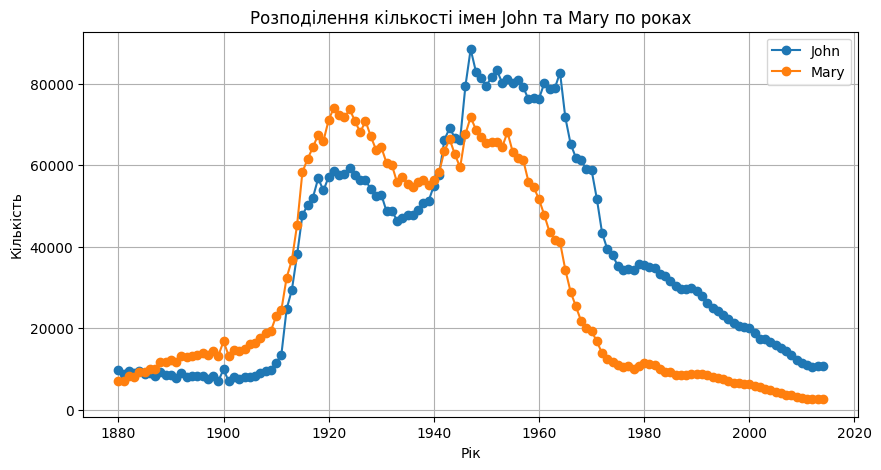

In [38]:

john_data = data[data['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_data = data[data['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_data.index, john_data.values, label="John", marker='o')
plt.plot(mary_data.index, mary_data.values, label="Mary", marker='o')
plt.title("Розподілення кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid(visible=True)
plt.show()


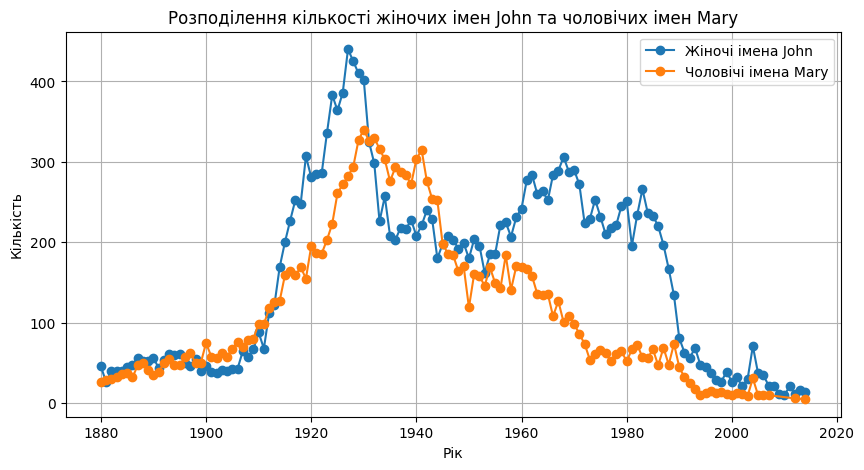

In [39]:

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_female.index, john_female.values, label="Жіночі імена John", marker='o')
plt.plot(mary_male.index, mary_male.values, label="Чоловічі імена Mary", marker='o')
plt.title("Розподілення кількості жіночих імен John та чоловічих імен Mary")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid(visible=True)
plt.show()


In [40]:

popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]
print("Найпопулярніші імена в кожному році:")
print(popular_names_per_year[['Year', 'Name', 'Count']])


Найпопулярніші імена в кожному році:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
10443    1885      Mary   9128
12737    1886      Mary   9890
15129    1887      Mary   9888
17502    1888      Mary  11754
20153    1889      Mary  11648
22743    1890      Mary  12078
25438    1891      Mary  11703
28098    1892      Mary  13173
31019    1893      Mary  12784
33850    1894      Mary  13151
36791    1895      Mary  13446
39840    1896      Mary  13811
42931    1897      Mary  13413
45959    1898      Mary  14406
49223    1899      Mary  13172
52265    1900      Mary  16707
55996    1901      Mary  13136
59149    1902      Mary  14486
62511    1903      Mary  14275
65900    1904      Mary  14962
69461    1905      Mary  16067
73117    1906      Mary  16370
76750    1907      Mary  17580
80698    1908      Mary  18666
84716    1909      Mary  19259
88